In [22]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [23]:
#https://arxiv.org/pdf/1101.3281.pdf

In [24]:
def generate_binary_list(N, fixed_length=None):
    a_test = range(2**N)
    binary_list = []
    # Determine the fixed length if not provided
    if fixed_length is None:
        fixed_length = len(bin(max(a_test))) - 2
    for num in a_test:
        binary_representation = bin(num)[2:]  # Convert to binary and remove the '0b' prefix
        binary_digits = [int(digit) for digit in binary_representation]
        while len(binary_digits) < fixed_length:
            binary_digits.insert(0, 0)
        binary_digits.reverse()
        binary_list.append(binary_digits)

    return a_test, binary_list

a_test, a_bin = generate_binary_list(3)

print("a_test:", list(a_test))
print("a_bin:", a_bin)

a_test: [0, 1, 2, 3, 4, 5, 6, 7]
a_bin: [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


In [25]:
def flip(a, i, j):
    f = 2**i + 2**j
    return a^f

def generate_Hamiltonian(N):
    a, a_binary = generate_binary_list(N)
    a = list(a)
    H = np.zeros((2**N, 2**N))
    for a_bin, a_int in zip(a_binary, a):
        for i in range(N):
            j = (i+1)%N
            if a_bin[i] == a_bin[j]:
                H[a_int,a_int] += 1/4
            else:
                H[a_int,a_int] -= 1/4
                b = flip(a_int, i, j)
                H[a_int, b] = 1/2
    return H

H_2 = generate_Hamiltonian(2)
#Todo: Why for N=7 imaginary?Numerical error

print(H_2)

[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.   0.   0.   0.5]]


In [26]:
eigs_2 = np.linalg.eig(H_2)
eigs_2.eigenvalues

array([ 1.11022302e-16, -1.00000000e+00,  5.00000000e-01,  5.00000000e-01])

In [27]:
np.transpose(eigs_2.eigenvectors) #Todo: Need to transpose?

array([[ 0.        ,  0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [28]:
eigenvalues = []
eigenvectors = []
list_N = np.arange(2,7)

for n in list_N:
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    eigvals = eigs.eigenvalues
    eigvecs = np.transpose(eigs.eigenvectors)
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

[np.min(e) for e in eigenvalues]

[-0.9999999999999999,
 -0.75,
 -1.9999999999999987,
 -1.8680339887499,
 (-2.8027756377319992+0j)]

In [29]:
for n in list_N:
    print(f"n = {n}:")
    print(eigenvectors[n-2][np.argmin(eigenvalues[n-2])])

n = 2:
[ 0.          0.70710678 -0.70710678  0.        ]
n = 3:
[ 0.          0.          0.          0.40824829  0.          0.40824829
 -0.81649658  0.        ]
n = 4:
[ 0.00000000e+00  2.77354685e-17  2.57913478e-17  2.88675135e-01
 -8.55761944e-17 -5.77350269e-01  2.88675135e-01  5.93181067e-17
  4.45654388e-17  2.88675135e-01 -5.77350269e-01  4.86828725e-33
  2.88675135e-01 -5.93181067e-17  4.86828725e-33  0.00000000e+00]
n = 5:
[ 0.00000000e+00  1.00607891e-16 -9.37588118e-17 -2.25301316e-01
  8.22872906e-17  4.57243147e-01 -5.72904897e-02  2.87191878e-12
  3.68069548e-17 -1.49988449e-01 -2.14556738e-01 -6.48222379e-12
  1.89893846e-01  2.96975423e-12  6.40566639e-13 -2.77218716e-17
  3.05548646e-17 -8.19533814e-02  4.97148544e-01  1.13468151e-12
 -5.89846503e-01  1.67624977e-12 -5.68277868e-12 -3.47167794e-18
  1.74651341e-01 -2.17032895e-12  7.51783158e-12 -2.82752094e-18
 -2.47571470e-12  2.18275281e-17  4.43718334e-33  0.00000000e+00]
n = 6:
[ 0.00000000e+00+0.j  1.11022302e-

In [30]:
eigenvectors[0][1]

array([ 0.        ,  0.70710678, -0.70710678,  0.        ])

# Part b

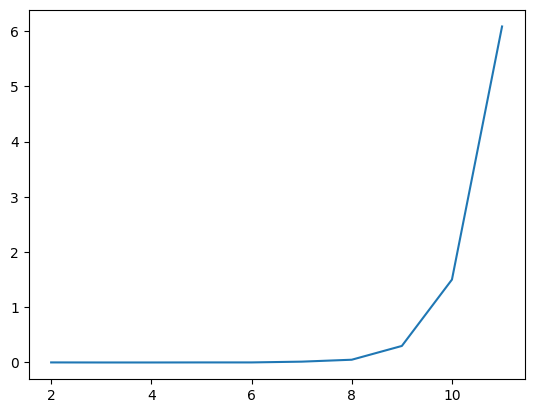

In [31]:
computing_times = []
list_N = np.arange(2,12)

for n in list_N:
    start = time.time()
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    stop = time.time()
    diff_time = stop - start
    computing_times.append(diff_time)

plt.plot(list_N, computing_times)

In [32]:
computing_times

[0.0009970664978027344,
 0.0,
 0.0,
 0.0009968280792236328,
 0.0009970664978027344,
 0.014960527420043945,
 0.049866437911987305,
 0.29933667182922363,
 1.5014209747314453,
 6.085248231887817]

Part c)

In [33]:
k_B = 1#.38 *10**(-23)

def magnetisation_for_state(state, N):
    list_a_int, list_a_bin = generate_binary_list(N)
    list_m = [] #Magnetisation per particle for all basis states
    for spin_sequence in list_a_bin:
        m = 0
        for s in spin_sequence:
            if s == 1:
                m += 1
            elif s == -1:
                m -= 1
            elif s == 0:
                m -= 1
            else:
                print("Spin sequence is neither binary nor sequence of 1 and -1")
        list_m.append(m)
    m = 0
    for index, val in enumerate(state):
        m += list_m[index] * val**2 #Todo: quadrat oder nicht?
    return m/N

def specific_heat(energies, N, T):
    prefs = [np.exp(-e/T) for e in energies]
    mean_energy = np.average(energies, weights=prefs)
    mean_square_energy = np.average([e_i**2 for e_i in energies], weights=prefs)
    return (mean_square_energy - mean_energy**2)/(N*k_B*T**2)

def magnetic_susceptibility(arr_states, energies, N, T):
    prefs = [np.exp(-e/T) for e in energies]
    m_states = []
    for state in arr_states:
        m_s = magnetisation_for_state(state, N)
        m_states.append(m_s)
    m_mean = np.average(m_states, weights=prefs)
    m_2_mean = np.average([m**2 for m in m_states], weights=prefs)
    return (1/T)*(m_2_mean-m_mean**2)

def C_v(N, T, J=1):
    frac = J/(k_B*T)
    enum = frac**2
    denom = np.cosh(frac)**2
    return N*k_B*enum/denom

In [34]:
list_N_c = [4,8]#,12] #Todo: Add another
specific_heats = []
magnetic_susceptibilities = []
list_T = np.linspace(0.1,2,100)

for n in list_N_c:
    list_sp = []
    list_ms = []
    for temp in list_T:
        H_n = generate_Hamiltonian(n)
        eigs = np.linalg.eig(H_n)
        eigvecs = eigs.eigenvectors
        sp = specific_heat(eigs.eigenvalues, n, temp)
        list_sp.append(sp)
        ms = magnetic_susceptibility(eigvecs, eigs.eigenvalues, n, temp)
        list_ms.append(ms)
    magnetic_susceptibilities.append(list_ms)
    specific_heats.append(list_sp)

C:\Users\corin\PycharmProjects\Computational-physics\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\corin\PycharmProjects\Computational-physics\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


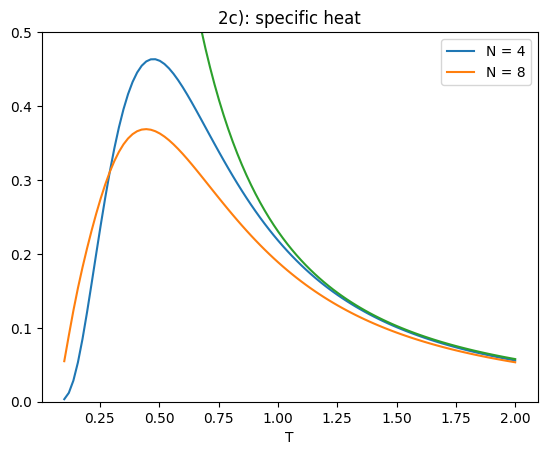

In [35]:
plt.plot(list_T, specific_heats[0], label="N = 4")
plt.plot(list_T, specific_heats[1], label="N = 8")
#plt.plot(list_T, specific_heats[2], label="N = 12") #Todo: Calculate and plot this as well
plt.plot(list_T, [3/(13*t**2) for t in list_T])
plt.title("2c): specific heat")
plt.xlabel("T")
plt.ylim(0,0.5)
plt.legend()

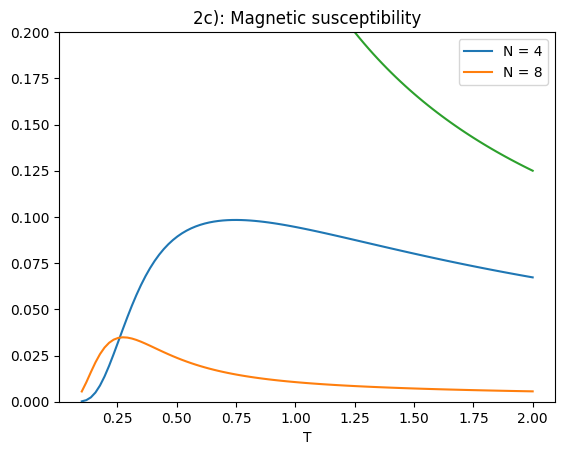

In [36]:
plt.plot(list_T, magnetic_susceptibilities[0], label="N = 4")
plt.plot(list_T, magnetic_susceptibilities[1], label="N = 8")
plt.plot(list_T, [1/(4*t) for t in list_T])
#plt.plot(list_T, specific_heats[2], label="N = 12") #Todo: Calculate and plot this as well
#plt.plot(list_T, [3/(13*t**2) for t in list_T])
plt.title("2c): Magnetic susceptibility")
plt.xlabel("T")
plt.ylim(0,0.2)
plt.legend()

In [37]:
def correlation_spins(spin_sequence, i=0, j=2):
    return spin_sequence[i]*spin_sequence[j]

In [38]:
# Problem 3

N=3

H = generate_Hamiltonian(N)
print(H)

#M = math.factorial(N)/(math.factorial(n_up)*math.factorial(N-n_up))

def get_basis_set(m_z, N):
    n_up = m_z + N/2 
    basis_set = []
    a = 0
    for s, s_bin in zip(*generate_binary_list(N)):
        if np.sum(s_bin) == n_up:
            a += 1
            s_a = s
            basis_set.append(s_a)
    M = a
    return basis_set, M
    
s_a, a = get_basis_set(1/2, N)

[[ 0.75  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.    0.5   0.    0.    0.  ]
 [ 0.    0.5  -0.25  0.    0.5   0.    0.    0.  ]
 [ 0.    0.    0.   -0.25  0.    0.5   0.5   0.  ]
 [ 0.    0.5   0.5   0.   -0.25  0.    0.    0.  ]
 [ 0.    0.    0.    0.5   0.   -0.25  0.5   0.  ]
 [ 0.    0.    0.    0.5   0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.75]]


In [103]:
def findstate(s_, b, M):
    #s_b = list(bin(b)[2:])
    #s_b.reverse()
    s_b = s_
    bmin = 1; bmax = M
    while True:
        b = bmin + (bmax-bmin)/2
        if s_ < s_b:
            bmax = b-1
        elif s_ > s_b:
            bmin = b+1
        else:
            break
    return b

def generate_Hamiltonian_for_mz(N, mz):
    s_a, M = get_basis_set(mz, N) #implements the pseudo code {3} in the script
    H = np.zeros((2**N, 2**N))
    for a in s_a:
        for i in range(M):
            j = (i+1)%M
            s_b = bin(a)[2:].zfill(M)
            if s_b[i] == s_b[j]:
                H[a,a] += 1/4
            else:
                H[a,a] -= 1/4
                b = flip(a, i, j)
                s_asterisk = flip(a, i, j)
                findstate(s_asterisk, b, M)
                H[a, b] = 1/2
    return H

In [104]:
h = generate_Hamiltonian_for_mz(3, 1/2)
print(h)

3 011
0
3 011
3 011
6
5 101
6
5 101
3
5 101
6 110
6 110
0
6 110
3
[[ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.5   0.    0.   -0.25  0.    0.    0.5   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.5   0.   -0.25  0.5   0.  ]
 [ 0.5   0.    0.    0.5   0.    0.   -0.25  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


In [88]:
for index, num in enumerate(["a","b","c"]):
    print(index)

0
1
2
